In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn import metrics


from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix





In [2]:
pd.set_option('display.max_columns', None)
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)

In [3]:
#importing numerical

numerical = pd.read_csv('numerical.csv')
display(numerical.head())

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [4]:
#importing target

target = pd.read_csv('target.csv')
display(target.head())

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [5]:
# putting all data together: numerical & target

all_data = pd.concat((numerical,target),axis=1)
all_data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18

In [6]:
donations_data = all_data[all_data['TARGET_B']==1] #numerical data for the people that have donated 

X = donations_data.drop(columns=['TARGET_B','TARGET_D'])
y = donations_data['TARGET_D']

In [7]:
# overview y :

y.value_counts()

10.00    941
15.00    591
20.00    577
5.00     503
25.00    392
        ... 
10.70      1
18.25      1
16.87      1
2.50       1
44.21      1
Name: TARGET_D, Length: 70, dtype: int64

In [8]:
#adding a  column with  1s :

X_added_constant = sm.add_constant(X)
X_added_constant


C:\Users\pbsil\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
20,1.0,2,62.000000,3,8,10,2,25,40,27,11,4,1,9,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.00,15,10,2.00,7.0,5.0,12,4.066667,82943,1,3,3
30,1.0,0,61.611649,5,9,0,1,37,58,16,8,1,5,9,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.00,11,6,2.00,10.0,7.0,9,6.181818,190313,1,3,14
45,1.0,0,66.000000,5,9,5,0,33,24,39,6,5,1,9,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,97,3,8,27,76,71,25,89,11,2,0,2,9,18,2,16,62,21,0,0,0,15,33,74,88,98,2,0,70,67,67,13,3,28,0,0,2,2,0,0,39,57,71,89,1360.0,173.0,637.0,550,637,607,703,26007,5,11,19,10,24,17,5,3,5,1,5,16,12,28,22,6,5,6,27,1,76,1,61,39,12,89,7,0,0,0,0,0,0,3,1,5,13,16,3,39,67,79,56,78,52,67,67,0,0,0,25,24,4,13,12,0,1,6,0,9,1,3,1,1,0,3,21,2,4,3,19,7

In [9]:
# Ordinary least squares ( linear regression)

model = sm.OLS(y,X_added_constant).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TARGET_D   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     16.56
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:30:18   Log-Likelihood:                -17226.
No. Observations:                4843   AIC:                         3.508e+04
Df Residuals:                    4527   BIC:                         3.713e+04
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9657      2.375      6.723      0.000      11.310      20.621
TCODE      -4.046e-05      0.000     -0.359      0.720      -0.000       0.000
AGE            0.0169      0.010      1.655      0.098      -0.003       0.037
INCOME         0.0541      0.090      0.599      0.549      -0.123       0.231
WEALTH1        0.0521      0.063      0.823      0.411      -0.072       0.176
HIT           -0.0220      0.014     -1.522      0.128      -0.050       0.006
MALEMILI      -0.0786      0.050     -1.564      0.118      -0.177       0.020
MALEVET        0.0005      0.026      0.020      0.984      -0.051       0.052
VIETVETS      -0.0100      0.017     -0.594      0.552      -0.043       0.023
WWIIVETS      -0.0363      0.017     -2.143      0.032      -0.069      -0.003
LOCALGOV       0.0945      0.060      1.572      0.116      -0.023       0.212
STATEGOV       0.0306      0.059      0.517      0.605      -0.085       0.146
FEDGOV         0.1504      0.082      1.839      0.066      -0.010       0.311
WEALTH2       -0.0008      0.061     -0.013      0.990      -0.120       0.118
POP901        -0.0003      0.000     -1.340      0.180      -0.001       0.000
POP902         0.0003      0.001      0.351      0.725      -0.001       0.002
POP903         0.0005      0.000      1.138      0.255      -0.000       0.001
POP90C1        0.6152      0.350      1.758      0.079      -0.071       1.301
POP90C2        0.6131      0.349      1.759      0.079      -0.070       1.296
POP90C3        0.6166      0.350      1.763      0.078      -0.069       1.302
POP90C4       -1.5998      4.544     -0.352      0.725     -10.509       7.310
POP90C5       -1.7343      4.543     -0.382      0.703     -10.642       7.173
ETH1           0.7087      0.228      3.105      0.002       0.261       1.156
ETH2          -0.2149      0.282     -0.763      0.445      -0.767       0.337
ETH3           0.0820      0.073      1.125      0.261      -0.061       0.225
ETH4           0.1285      0.147      0.875      0.382      -0.159       0.416
ETH5          -0.6731      0.246     -2.732      0.006      -1.156      -0.190
ETH6          -0.2976      0.282     -1.054      0.292      -0.851       0.256
ETH7          -0.0102      0.168     -0.061      0.951      -0.340       0.319
ETH8          -0.0632      0.150     -0.421      0.673      -0.357       0.231
ETH9          -0.1884      0.152     -1.241      0.215      -0.486       0.109
ETH10         -0.0545      0.180     -0.303      0.762      -0.408       0.299
ETH11         -0.2751      0.220     -1.252      0.211      -0.706       0.156
ETH12         -0.0136      0.201     -0.068      0.946      -0.407       0.380
ETH13          0.6936      0.246      2.819      0.005       0.211       1.176
ETH14          0.7806      0.272      2.874      0.004       0.248       1.313
ET

In [10]:
model.pvalues

const       2.000386e-11
TCODE       7.196730e-01
AGE         9.803590e-02
INCOME      5.493183e-01
WEALTH1     4.107787e-01
                ...     
AVGGIFT     1.264200e-02
CONTROLN    4.260256e-02
HPHONE_D    5.954328e-01
RFA_2F      2.359012e-38
CLUSTER2    3.799378e-01
Length: 316, dtype: float64

In [11]:
#  keeping the features where p<0.05


test = model.pvalues
list = []
list.append(test)

pval_df = pd.DataFrame(list).T

pval_to_keep = pval_df[pval_df[0]<0.05]

pval_to_keep

,0
const,2.000386e-11
WWIIVETS,3.213260e-02
ETH1,1.915311e-03
ETH5,6.314210e-03
ETH13,4.842768e-03
ETH14,4.067641e-03
ETH15,6.662107e-03
ETH16,1.555951e-03
ETHC1,3.529519e-03
ETHC2,6.299727e-03


In [12]:
X = all_data[['WWIIVETS', 'ETH1', 'ETH5', 'ETH13', 'ETH14', 'ETH15',
       'ETH16', 'ETHC1', 'ETHC2', 'ETHC3', 'HUR1', 'HUPA4', 'HUPA5',
       'HUPA6', 'HUPA7', 'RP3', 'DMA', 'HC17', 'HC19', 'HC20', 'AC2',
       'RAMNTALL', 'NGIFTALL', 'MINRAMNT',
       'LASTGIFT', 'TIMELAG', 'AVGGIFT', 'CONTROLN', 'RFA_2F']]

y = all_data[['TARGET_B', 'TARGET_D']]

<AxesSubplot:>

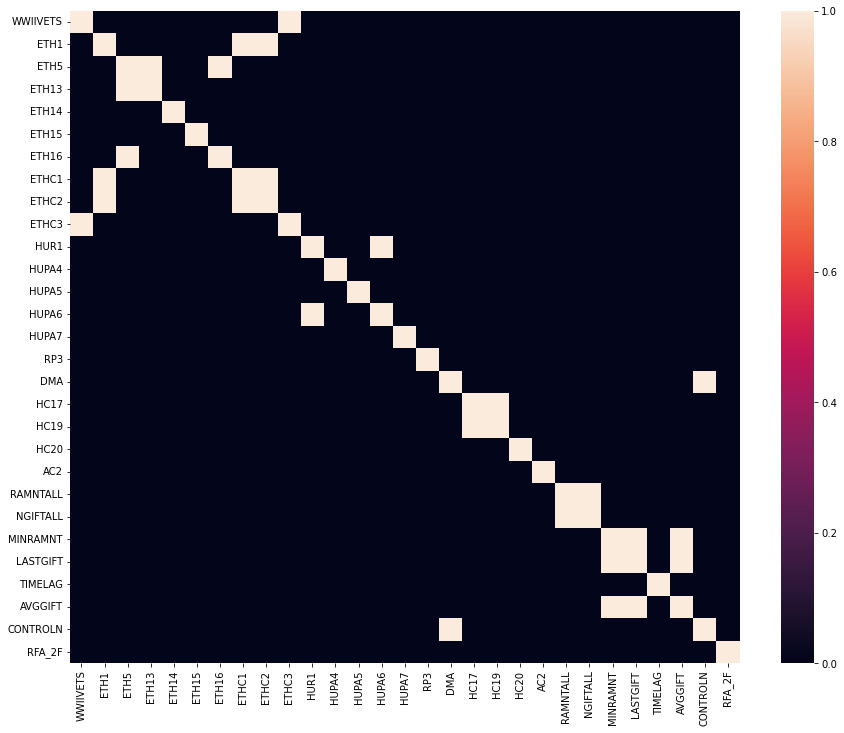

In [13]:
# correlation positives features: 

sns.heatmap(X.corr() > 0.5)

<AxesSubplot:>

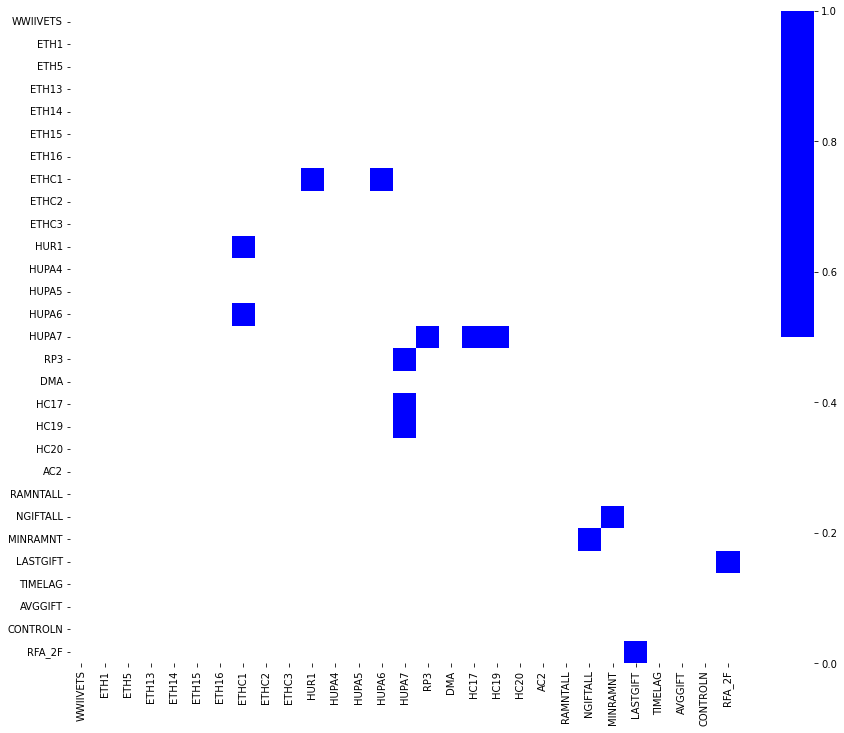

In [14]:
# correlation negative features: 


sns.heatmap(X.corr() < -0.3,cmap=['white','blue'],)

<AxesSubplot:>

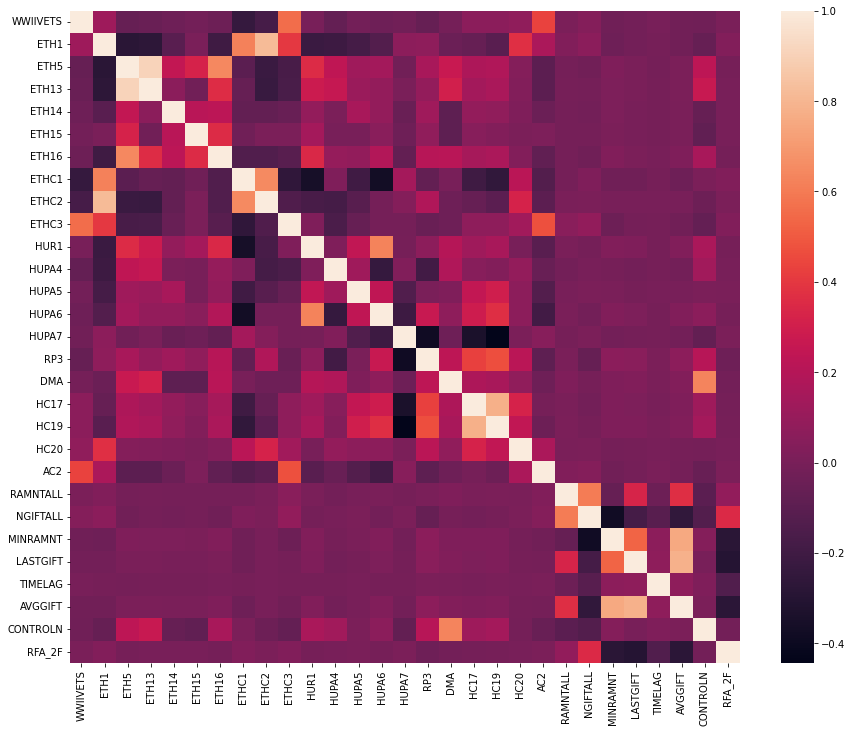

In [15]:

# overall heatmap (aiming for 20 features using correlation matrix) 

sns.heatmap(X.corr())

In [16]:

columns_to_keep = ['WWIIVETS',  'ETH5', 'ETH13', 'ETH14', 'ETH15',
        'ETHC2', 'HUR1', 'HUPA4', 'HUPA5',
       'RP3', 'DMA', 'HC17', 'HC20', 'AC2',
       'RAMNTALL', 'TIMELAG', 'AVGGIFT', 'RFA_2F']

In [17]:
# adding the numericals to the features X

X = X[columns_to_keep]

X.shape, y.shape

((95412, 18), (95412, 2))

In [18]:
categorical = pd.read_csv('categorical.csv')
categorical_columns = ['GENDER', 'STATE']
X[['GENDER', 'STATE']] = categorical[['GENDER', 'STATE']] 

In [19]:
# checking X and Y allignment in terms of rows :

X.shape

(95412, 20)

In [20]:

y.shape



(95412, 2)

In [21]:
X.shape, y.shape

((95412, 20), (95412, 2))

In [22]:
# there is an imbalance  problem to be addressed:

all_data['TARGET_B'].value_counts()


0    90569
1     4843
Name: TARGET_B, dtype: int64

In [23]:
#train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# outcome:

X_train.shape, X_test.shape

((71559, 20), (23853, 20))

In [24]:

# Splitting categorical and numerical :

X_train_num = X_train.drop(categorical_columns, axis=1)
X_test_num = X_test.drop(categorical_columns, axis=1)
X_train_cat = X_train[categorical_columns]
X_test_cat = X_test[categorical_columns]


In [25]:
#Scaling X train:


transformer = MinMaxScaler().fit(X_train_num)


X_train_normalized = transformer.transform(X_train_num)
X_test_normalized = transformer.transform(X_test_num)





In [26]:
# Dataframe for X train:

X_train_norm = pd.DataFrame(X_train_normalized, columns = X_train_num.columns) 
X_train_norm.head()

,WWIIVETS,ETH5,ETH13,ETH14,ETH15,ETHC2,HUR1,HUPA4,HUPA5,RP3,DMA,HC17,HC20,AC2,RAMNTALL,TIMELAG,AVGGIFT,RFA_2F
0,0.484848,0.010101,0.010309,0.0,0.0,0.333333,0.030303,0.212121,0.060606,0.191919,0.785471,1.000000,1.0,0.070707,0.007392,0.003676,0.010871,1.0
1,0.333333,0.010101,0.010309,0.0,0.0,0.595960,0.050505,0.090909,0.141414,0.454545,0.869467,0.878788,1.0,0.060606,0.021859,0.007353,0.009298,0.0
2,0.404040,0.010101,0.010309,0.0,0.0,0.565657,0.010101,0.070707,0.181818,0.363636,0.700341,1.000000,1.0,0.070707,0.000528,0.010110,0.008726,0.0
3,0.111111,0.010101,0.000000,0.0,0.0,0.707071,0.000000,0.010101,0.000000,1.000000,0.600454,1.000000,1.0,0.050505,0.009398,0.010110,0.010283,0.0
4,0.515152,0.010101,0.010309,0.0,0.0,0.575758,0.010101,0.070707,0.010101,0.545455,0.930760,1.000000,1.0,0.121212,0.013939,0.006434,0.005722,0.0


In [27]:
# Dataframe for X test:

X_test_norm = pd.DataFrame(X_test_normalized, columns = X_test_num.columns) 
X_test_norm.head()

,WWIIVETS,ETH5,ETH13,ETH14,ETH15,ETHC2,HUR1,HUPA4,HUPA5,RP3,DMA,HC17,HC20,AC2,RAMNTALL,TIMELAG,AVGGIFT,RFA_2F
0,0.222222,0.090909,0.051546,0.000000,0.012346,0.525253,0.020202,0.040404,0.020202,0.939394,0.911464,0.989899,1.0,0.060606,0.006969,0.000919,0.008851,0.000000
1,0.424242,0.010101,0.000000,0.000000,0.000000,0.010101,0.000000,0.181818,0.040404,0.454545,0.573212,1.000000,1.0,0.111111,0.010876,0.002757,0.006589,0.000000
2,0.222222,0.090909,0.061856,0.000000,0.000000,0.656566,0.000000,0.101010,0.000000,0.979798,0.911464,1.000000,1.0,0.050505,0.013728,0.006434,0.016861,0.000000
3,0.494949,0.000000,0.000000,0.000000,0.000000,0.656566,0.000000,0.060606,0.040404,0.838384,0.691260,1.000000,1.0,0.070707,0.012777,0.000919,0.005521,0.333333
4,0.030303,0.141414,0.072165,0.017544,0.049383,0.515152,0.010101,0.898990,0.030303,0.242424,0.970488,0.969697,1.0,0.010101,0.000528,0.008272,0.018738,0.000000


In [28]:
#Resetting the index for the target: 

y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [29]:
# Treating the categoricals (OneHot encoding)

In [30]:
# X_train :


encoder = OneHotEncoder(drop='first').fit(X_train_cat) 
encoded = encoder.transform(X_train_cat).toarray()
encoded_columns = OneHotEncoder(drop='first').fit(X_train_cat).get_feature_names(input_features=X_train_cat.columns) 

X_train_encoded = pd.DataFrame(encoded, columns = encoded_columns)
X_train_encoded.head()



C:\Users\pbsil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,GENDER_M,GENDER_other,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
# X_test :

encoded = encoder.transform(X_test_cat).toarray()
encoded_columns = OneHotEncoder(drop='first').fit(X_test_cat).get_feature_names(input_features=X_test_cat.columns) 


X_test_encoded = pd.DataFrame(encoded, columns = encoded_columns)
X_test_encoded.head()

C:\Users\pbsil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,GENDER_M,GENDER_other,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# building the final X_train and X_test 

X_train_combined = pd.concat([X_train_norm, X_train_encoded], axis=1)
X_test_combined = pd.concat([X_test_norm, X_test_encoded], axis=1)

In [33]:
# Upsampling (sorting out the imbalance  problem) :

In [34]:
train = pd.concat((y_train, X_train_combined), axis =1)
train.head()
train.shape

(71559, 33)

In [35]:
# segregating the categoricls between 0 and 1, so that we upsample the "1" observations:


category_0 = train[train['TARGET_B'] == 0] 
category_1 = train[train['TARGET_B'] == 1]

category_1_oversampled = resample(category_1, replace=True, n_samples = len(category_0)) 


In [36]:
print(category_0.shape)
print(category_1_oversampled.shape)

(67970, 33)
(67970, 33)


In [37]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

data_upsampled['TARGET_B'].value_counts()

0    67970
1    67970
Name: TARGET_B, dtype: int64

In [38]:
# rebuilding the X and Y trains (post Upsampling)


y_train_balanced_up = data_upsampled['TARGET_B']

In [39]:

X_train_balanced_up = data_upsampled.drop(columns=['TARGET_B', 'TARGET_D'])

In [40]:
y_train_balanced_up.shape, X_train_balanced_up.shape

((135940,), (135940, 31))

In [41]:
#Logistic Regression

classification = LogisticRegression(random_state=0, solver='saga', 
                                    multi_class='multinomial').fit(X_train_balanced_up, y_train_balanced_up)




classification.score(X_test_combined, y_test['TARGET_B'])

0.6095669307843877

In [42]:
#predicting

pred = classification.predict(X_test_combined)
print(metrics.classification_report(y_test['TARGET_B'], pred))

              precision    recall  f1-score   support

           0       0.96      0.61      0.75     22599
           1       0.07      0.54      0.13      1254

    accuracy                           0.61     23853
   macro avg       0.52      0.58      0.44     23853
weighted avg       0.91      0.61      0.72     23853



# Random Forest

In [43]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix



In [44]:

# we'll use 80% of X-train  in each tree 


clf = RandomForestClassifier(max_depth=5, min_samples_split=2, min_samples_leaf =2, max_samples=0.8,  random_state = 42)

clf.fit(X_train_balanced_up, y_train_balanced_up)


print(clf.score(X_train_balanced_up, y_train_balanced_up))
print(clf.score(X_test_combined, y_test['TARGET_B']))



0.6043769309989702
0.6102796293967215


In [45]:
y_pred = clf.predict(X_test_combined)
display(confusion_matrix(y_test['TARGET_B'], y_pred))

array([[13885,  8714],
       [  582,   672]], dtype=int64)

In [46]:
print(metrics.classification_report(y_test['TARGET_B'], y_pred)) 

              precision    recall  f1-score   support

           0       0.96      0.61      0.75     22599
           1       0.07      0.54      0.13      1254

    accuracy                           0.61     23853
   macro avg       0.52      0.58      0.44     23853
weighted avg       0.91      0.61      0.72     23853



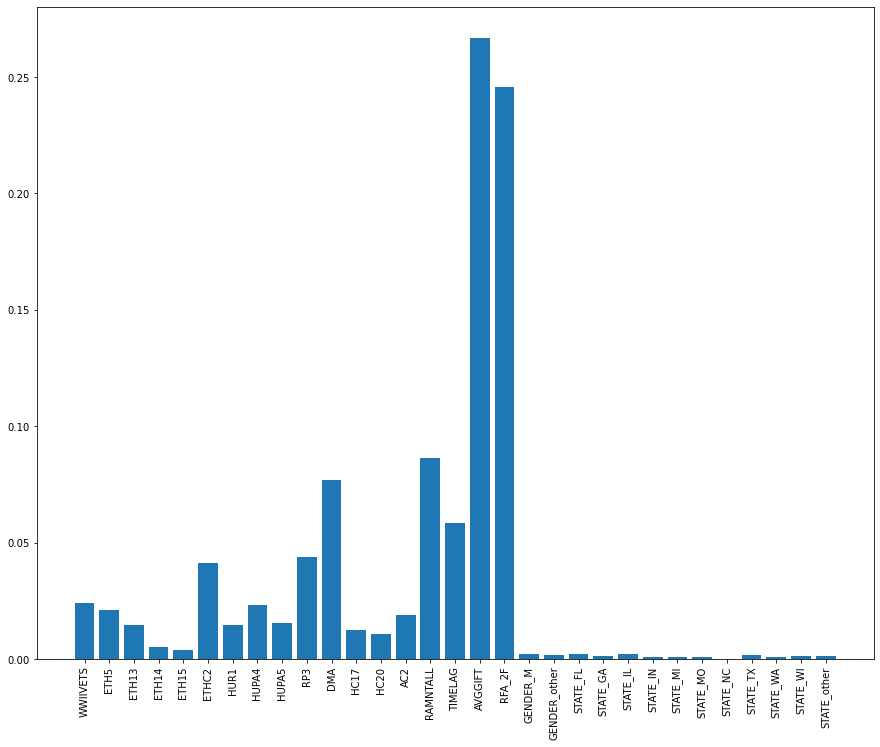

In [47]:
plt.bar(height = clf.feature_importances_, x=X_test_combined.columns)
plt.xticks(rotation=90)
plt.show()


In [48]:
# Random Forest Regressor

In [49]:
# combining X_train and X_test and Y_train and Y_test

train = pd.concat([X_train_combined, y_train], axis=1)
test = pd.concat([X_test_combined, y_test], axis=1)

In [50]:
# train and test must cover the actual donars

train_donation = train[train['TARGET_B']==1]
test_donation = test[test['TARGET_B']==1]

In [51]:
X_train_donation = train_donation.drop(['TARGET_B', 'TARGET_D'], axis=1)
X_test_donation = test_donation.drop(['TARGET_B', 'TARGET_D'], axis=1)

y_train_donation = train_donation['TARGET_D']
y_test_donation = test_donation['TARGET_D']

In [52]:
# regressor aplied at 80% of X Train in each tree



reg = RandomForestRegressor(max_depth=4,  min_samples_split=2, min_samples_leaf =10, max_samples=0.8, random_state = 42)
reg.fit(X_train_donation, y_train_donation)

print('train score: ', reg.score(X_train_donation, y_train_donation))
print('test score: ', reg.score(X_test_donation, y_test_donation))



train score:  0.5311760152819227
test score:  0.420613098094601


In [53]:
y_pred = reg.predict(X_test_donation)
print('mse: ',metrics.mean_squared_error(y_test_donation, y_pred))

mse:  128.56775877279134


In [54]:
# prediction

y_pred

array([ 5.88867859, 10.56441256, 10.91221775, ..., 10.81729795,
       10.61691522, 10.58063196])